In [1]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'

os.getcwd()

'C:\\Users\\campus4D044\\Desktop\\imbank\\project2'

In [12]:
customer = pd.read_csv('./data/result_iMdata/customer_result.csv',encoding='utf-8')[['고객ID','연령대','성별','고객등급','이탈여부']]

In [2]:
card = pd.read_csv('./data/result_iMdata/card_result.csv',encoding='utf-8')

In [14]:
# customer['기준년월']=pd.Categorical(customer['기준년월'])
customer['고객ID']=pd.Categorical(customer['고객ID'])
customer['연령대']=pd.Categorical(customer['연령대'])
customer['성별']=pd.Categorical(customer['성별'])
customer['고객등급']=pd.Categorical(customer['고객등급'])

In [4]:
# card['거래년월']=pd.Categorical(card['거래년월'])
card['고객ID']=pd.Categorical(card['고객ID'])
card['가맹점업종명']=pd.Categorical(card['가맹점업종명'])
card['가맹점_광역시도']=pd.Categorical(card['가맹점_광역시도'])
card['가맹점_시군구']=pd.Categorical(card['가맹점_시군구'])
categories =['5번이하', '5번초과 10번이하', '10번초과 15번이하', '15번초과 20번이하','20번 초과']
card['승인건수'] = pd.Categorical(card['승인건수'], categories=categories)
card['승인건수'] = card['승인건수'].astype('category')

In [5]:
df=card.copy()


업종대분류 = {
    # 숙박 및 여행
    '1급 호텔': '숙박 및 여행',
    '2급 호텔': '숙박 및 여행',
    '특급호텔': '숙박 및 여행',
    '콘도': '숙박 및 여행',
    '관광여행': '숙박 및 여행',
    '여객선': '숙박 및 여행',
    '철도': '숙박 및 여행',
    '항공사': '숙박 및 여행',
    # 외식 및 음식 관련
    '일반한식': '외식 및 음식',
    '서양음식': '외식 및 음식',
    '중국식': '외식 및 음식',
    '일식·회집': '외식 및 음식',
    '한정식': '외식 및 음식',
    '제과점': '외식 및 음식',
    '스넥': '외식 및 음식',
    '갈비전문점': '외식 및 음식',
    # 음주
    '주점': '음주',
    '단란주점': '음주',
    '칵테일바': '음주',
    '유흥주점': '음주',
    '주류판매점': '음주',
    # 음료
    '기타음료식품': '음료',
    # 마트
    '정육점': '마트',
    '대형할인점': '마트',
    '슈퍼마켓': '마트',
    '편 의 점': '마트',
    '농협하나로클럽': '마트',
    '기타유통업': '마트',
    # 쇼핑
    '인터넷Mall': '쇼핑',
    '인터넷P/G': '쇼핑',
    '인터넷종합Mall': '쇼핑',
    '일반(통신판매)': '쇼핑',
    '정장': '쇼핑',
    '스포츠의류': '쇼핑',
    '아동의류': '쇼핑',
    '내의판매': '쇼핑',
    '안경': '쇼핑',
    '시 계': '쇼핑',
    '신 발': '쇼핑',
    '기타의류': '쇼핑',
    '기타잡화': '쇼핑',
    # 차량 및 유류
    'GS주유소': '차량 및 유류',
    'SK주유소': '차량 및 유류',
    '쌍용S-OIL': '차량 및 유류',
    '주유소': '차량 및 유류',
    'GS가스충전소': '차량 및 유류',
    'SK가스충전소': '차량 및 유류',
    '쌍용S-OIL가스충전소': '차량 및 유류',
    'E1가스충전소': '차량 및 유류',
    '현대정유(오일뱅크)': '차량 및 유류',
    '현대정유가스충전소': '차량 및 유류',
    '전기차충전소': '차량 및 유류',
    'LPG취급점': '차량 및 유류',
    # 의료
    '병 원(응급실운영)': '의료',
    '종합병원': '의료',
    '의 원': '의료',
    '치과병원': '의료',
    '치과의원': '의료',
    '한 의 원': '의료',
    '한방병원': '의료',
    '약 국': '의료',
    '기타의료기관 및 기타의료기기': '의료',
    '건강진단': '의료',
    '한약방': '의료',
    # 기타 의료
    '의료용품': '기타 의료',
    '안마/스포츠마사지': '기타 의료',
    '헬스클럽': '기타 의료',
    '인삼제품': '기타 의료',
    '홍삼제품': '기타 의료',
    '기타건강식품': '기타 의료',
    # 교육 및 학원
    '학원': '교육',
    '보습학원': '교육',
    '기능학원': '교육',
    '예·체능계학원': '교육',
    '외국어학원': '교육',
    '초중고교육기관': '교육',
    '기타 교육기관': '교육',
    '독서실': '교육',
    # 스포츠
    '스크린골프': '스포츠',
    '골프경기장': '스포츠',
    '골프연습장': '스포츠',
    '골프용품 전문점': '스포츠',
    '수 영 장': '스포츠',
    '볼 링 장': '스포츠',
    '당구장': '스포츠',
    '기타레져업소': '스포츠',
    '레져업소': '스포츠',
    '스포츠·레져용품': '스포츠',
    # 문화
    '노 래 방': '문화',
    '영화관': '문화',
    '종합레져타운': '문화',
    '문화취미기타': '문화',
    # 보험
    '생명보험': '생명 보험',
    # 기타 보험
    '손해보험': '기타 보험',
    '기타보험': '기타 보험',
    # 금융 관련
    '상 품 권': '금융 관련',
    'PG상품권': '금융 관련',
    '비씨카드 정산용가맹점': '금융 관련',
    # 통신 및 정보서비스
    'CATV': '통신 및 정보서비스',
    'CATV홈쇼핑': '통신 및 정보서비스',
    '이동통신요금': '통신 및 정보서비스',
    '통신서비스/소득공제비대상': '통신 및 정보서비스',
    '위성방송': '통신 및 정보서비스',
    # 건축 및 자재
    '기타건축자재': '건축 및 자재',
    '보일러·펌프·샷시': '건축 및 자재',
    '목재·석재·철물': '건축 및 자재',
    '건축용 요업제품': '건축 및 자재',
    '조명기구': '건축 및 자재',
}


df['업종대분류'] = df['가맹점업종명'].map(업종대분류)

# 조건 필터링
cond = df['업종대분류'].isin(['외식 및 음식', '마트', '의료','음주', '기타 보험', '기타 의료', '생명 보험'])

# 조건 만족하는 행만 선택 후 업종대분류 재분류
card_c = df.loc[cond].copy()
card_c['업종대분류'] = card_c['업종대분류'].map({
    '외식 및 음식': '외식',
    '마트': '마트',
    '의료': '의료',
    '기타 의료': '의료',
    '음주': '음주',
    '기타 보험': '보험',
    '생명 보험': '보험'
})

df = card_c.copy()

In [8]:
df['거래년월'] = pd.to_datetime(df['거래년월'])
df['월'] = df['거래년월'].dt.month

In [15]:
df = pd.merge(df,customer,on='고객ID',how='left')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38634128 entries, 0 to 38634127
Data columns (total 14 columns):
 #   Column    Dtype         
---  ------    -----         
 0   거래년월      datetime64[ns]
 1   고객ID      int64         
 2   가맹점업종명    category      
 3   가맹점_광역시도  category      
 4   가맹점_시군구   category      
 5   승인건수      category      
 6   승인금액      int64         
 7   이탈여부_x    object        
 8   업종대분류     object        
 9   월         int32         
 10  연령대       category      
 11  성별        category      
 12  고객등급      category      
 13  이탈여부_y    object        
dtypes: category(7), datetime64[ns](1), int32(1), int64(2), object(3)
memory usage: 2.2+ GB


In [83]:
df['연령대'] = df['연령대'].str[0:2].astype(int)

In [58]:
# 승인금액이 숫자형인지 확인 (아니면 float로 변환)
df['승인금액'] = pd.to_numeric(df['승인금액'], errors='coerce')

# 업종대분류-월별 승인금액 합계로 피벗 테이블 생성
pivot_df = df.pivot_table(index='월', columns='업종대분류', values='승인금액', aggfunc='sum', fill_value=0)

# 월 순서대로 정렬 (혹시 정렬 안 되어있다면)
pivot_df = pivot_df.sort_index()

# 업종별 전체 승인금액 합계 구하기
업종합계 = pivot_df.sum(axis=0)

# 큰 순서대로 정렬 (내림차순)
정렬된_업종 = 업종합계.sort_values(ascending=False).index

# 컬럼 순서 재배치 (업종 총합 많은 순서대로)
pivot_df = pivot_df[정렬된_업종]

In [73]:
pivot_df.head()

업종대분류           외식           마트           의료          보험          음주
월                                                                   
1      48887950000  51607760000  30276770000  5926600000  2293340000
2      48272460000  41543550000  29806740000  5823170000  2140560000
3      53783120000  48298100000  32540200000  6214670000  2217160000
4      52932560000  47565990000  30863000000  6127320000  2168000000
5      54308800000  49580720000  31674520000  6274130000  2199340000

In [74]:
# 원래 색상 리스트 (예: 5개의 업종)
base_colors = ['#2ca02c', '#1f77b4', '#9467bd', '#ff7f0e', '#d62728']

# 업종 수만큼 잘라서, 정렬 순서에 맞춰 색상 재정렬
colors = base_colors[:len(정렬된_업종)]

In [91]:
color_map = {
    '외식': '#2ca02c',
    '마트': '#1f77b4',
    '의료': '#9467bd',
    '보험': '#ff7f0e',
    '음주': '#d62728'
}

<Figure size 1200x600 with 0 Axes>

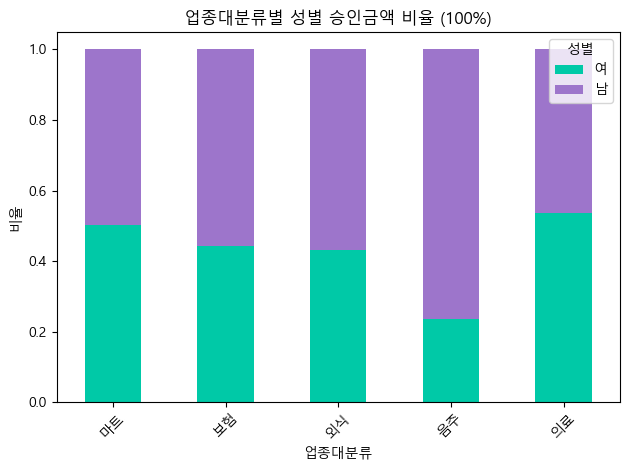

In [18]:
# 성별, 업종대분류별 승인금액 합계 계산
gender_group = df.groupby(['업종대분류', '성별'])['승인금액'].sum().unstack(fill_value=0)

# 업종대분류별 전체 승인금액 대비 성별 비율 계산 (각 막대 = 100%)
gender_ratio = gender_group.div(gender_group.sum(axis=1), axis=0)

# 시각화
plt.figure(figsize=(12, 6))
gender_ratio[['여', '남']].plot(kind='bar', stacked=True,color=['#00C9A7', '#9D75CB'])

plt.title('업종대분류별 성별 승인금액 비율 (100%)')
plt.ylabel('비율')
plt.xlabel('업종대분류')
plt.xticks(rotation=45)
plt.legend(title='성별')
plt.tight_layout()
plt.show()

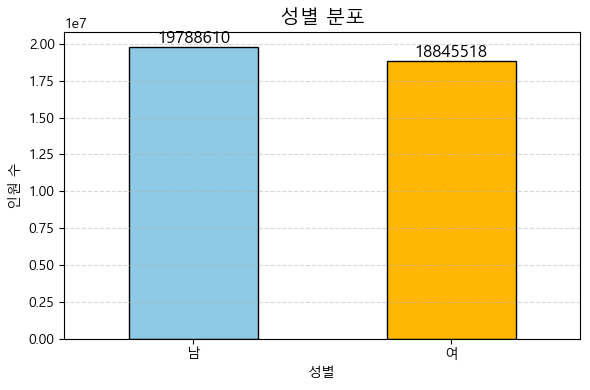

In [22]:
# 시각화
plt.figure(figsize=(6, 4))
df['성별'].value_counts().plot(kind='bar', color=['#8ecae6', '#ffb703'], edgecolor='black')

plt.title('성별 분포', fontsize=14)
plt.xlabel('성별')
plt.ylabel('인원 수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 값 표시
for i, count in enumerate(df['성별'].value_counts()):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

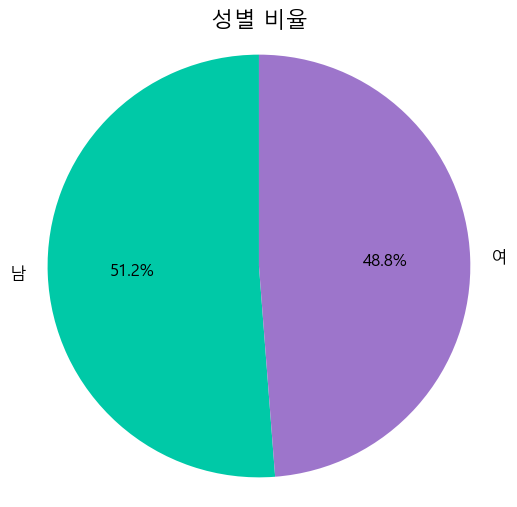

In [31]:
# 원그래프 그리기
plt.figure(figsize=(6, 6))
plt.pie(df['성별'].value_counts(), labels=df['성별'].value_counts().index, autopct='%.1f%%', startangle=90, colors=['#00C9A7', '#9D75CB'], textprops={'fontsize': 12})

plt.title('성별 비율', fontsize=16)
plt.axis('equal')  # 동그란 원으로 만들기
plt.show()

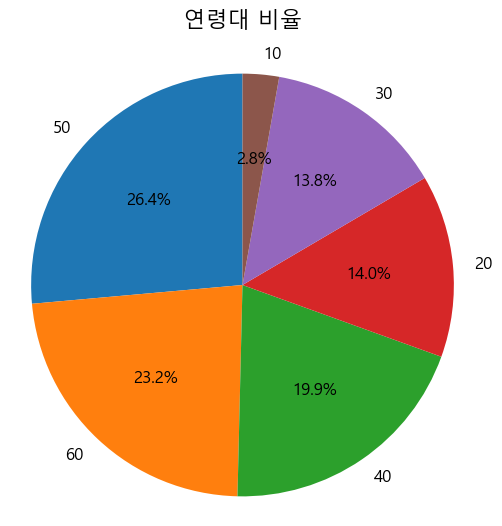

In [99]:
# 원그래프 그리기
plt.figure(figsize=(6, 6))
plt.pie(df['연령대'].value_counts(), labels=df['연령대'].value_counts().index, autopct='%.1f%%', startangle=90, textprops={'fontsize': 12})

plt.title('연령대 비율', pad=20, fontsize=16)
plt.axis('equal')  # 동그란 원으로 만들기
plt.show()

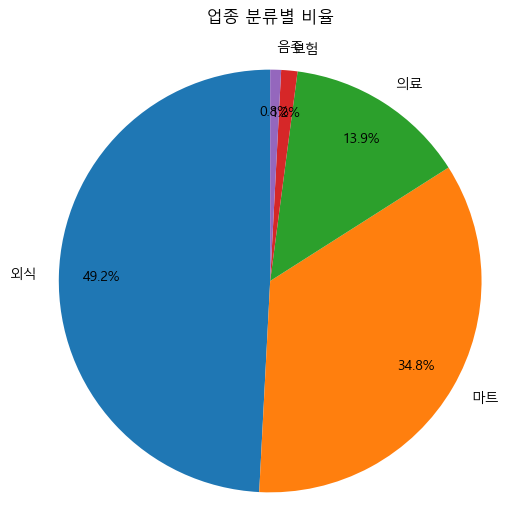

In [39]:
# 원그래프 그리기
plt.figure(figsize=(6, 6))
plt.pie(df['업종대분류'].value_counts(), labels=df['업종대분류'].value_counts().index, autopct='%.1f%%', startangle=90, textprops={'fontsize': 10}, pctdistance=0.8, labeldistance=1.1)

plt.title('업종 분류별 비율', pad=20)
plt.axis('equal')  # 동그란 원으로 만들기
plt.show()

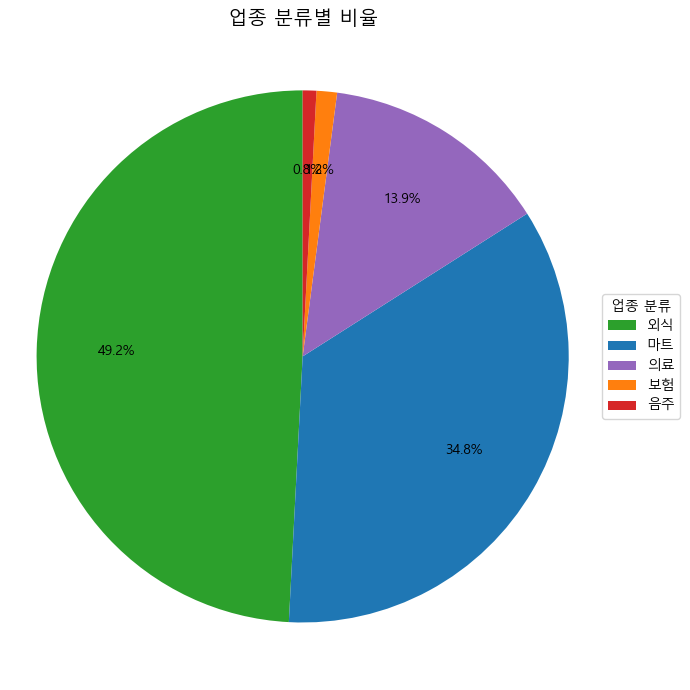

In [77]:
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    df['업종대분류'].value_counts(),
    autopct='%.1f%%',
    colors=colors,
    startangle=90,
    pctdistance=0.7
)

# 범례 추가
plt.legend(wedges, df['업종대분류'].value_counts().index, title="업종 분류", loc="center left", bbox_to_anchor=(1, 0.5),)

plt.title('업종 분류별 비율', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

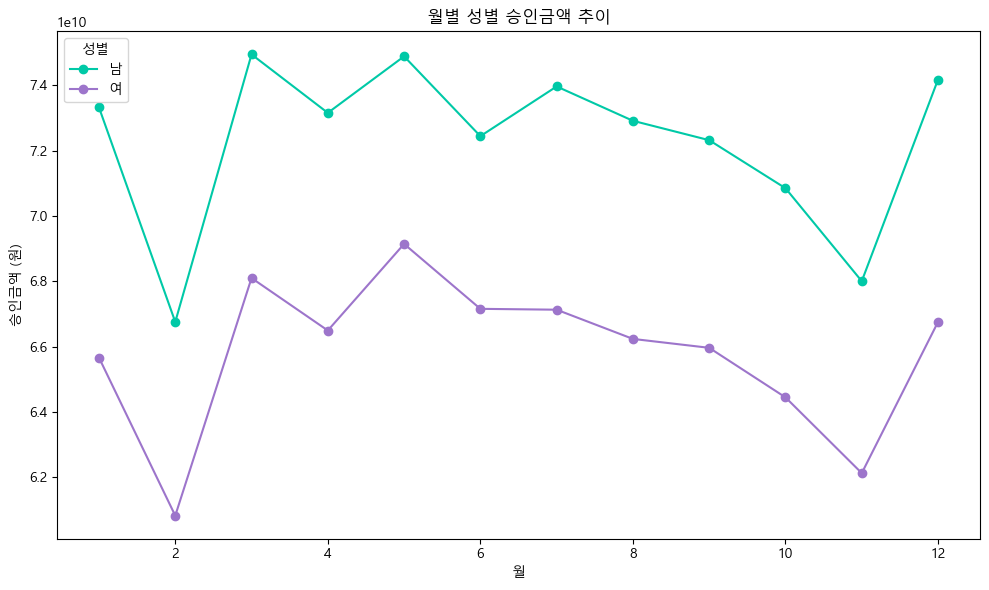

In [17]:
# 그래프 생성
ax = df.groupby(['월', '성별'])['승인금액'].sum().unstack().plot(
    kind='line', 
    marker='o',
    color=['#00C9A7', '#9D75CB'],  # 남성: IM Mint, 여성: Purple
    figsize=(10, 6)
)

# 꾸미기
plt.title('월별 성별 승인금액 추이')
plt.ylabel('승인금액 (원)')
plt.xlabel('월')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

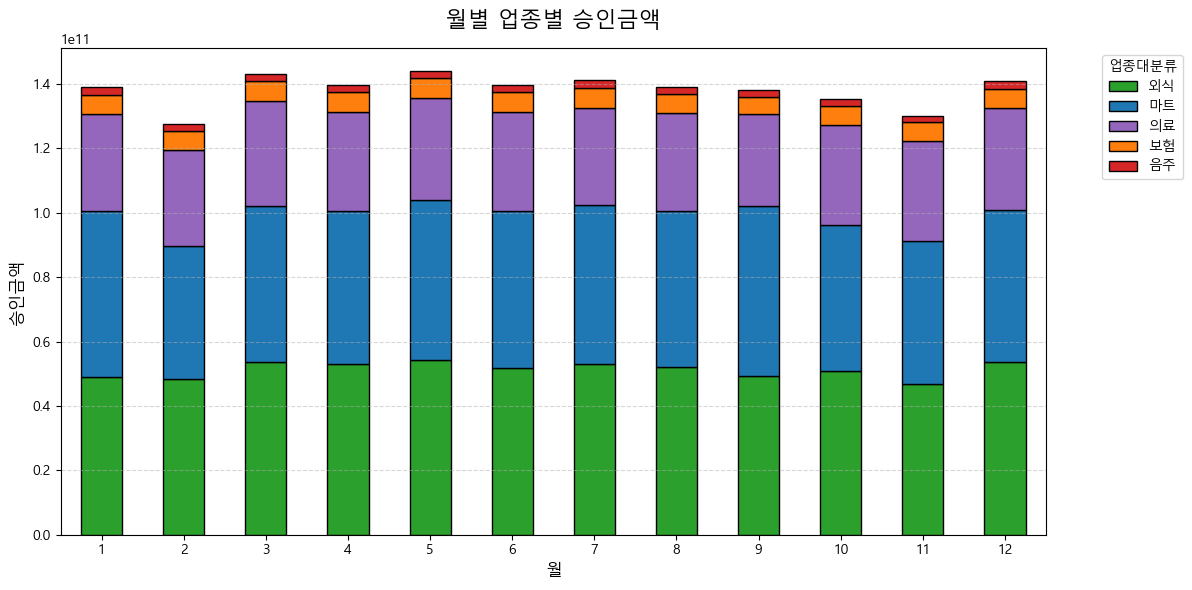

In [75]:
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=colors,
    edgecolor='black'
)

plt.title('월별 업종별 승인금액', fontsize=16, pad=15)
plt.xlabel('월', fontsize=12)
plt.ylabel('승인금액', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='업종대분류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

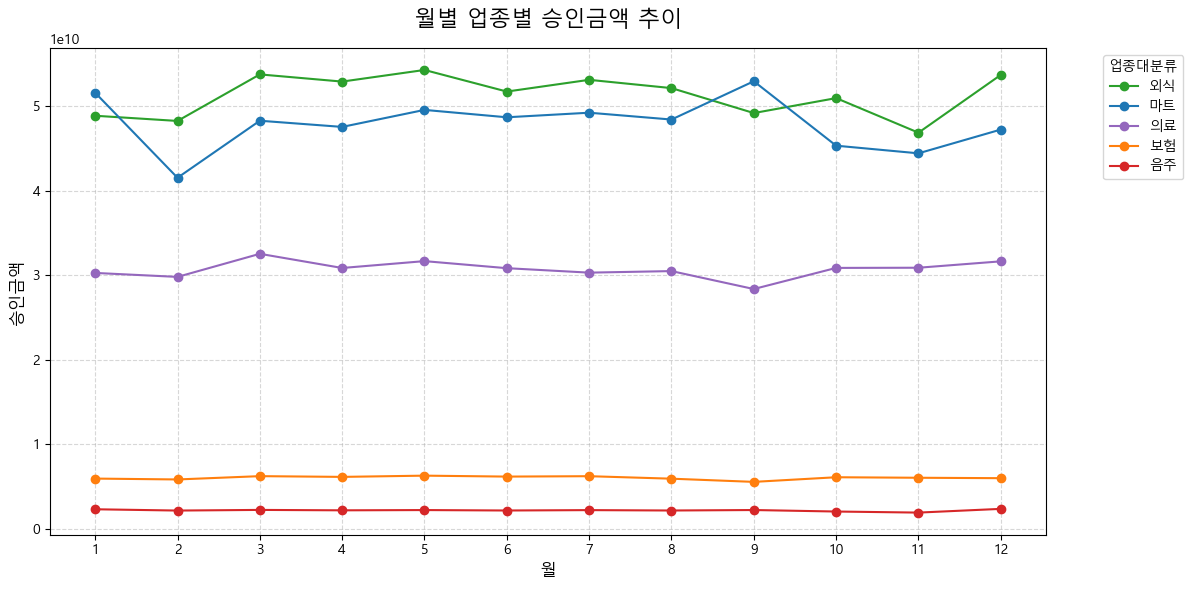

In [80]:
plt.figure(figsize=(12, 6))

for i, column in enumerate(pivot_df.columns):
    plt.plot(pivot_df.index, pivot_df[column], label=column, marker='o', color=colors[i % len(colors)])

# 그래프 설정
plt.title('월별 업종별 승인금액 추이', fontsize=16, pad=15)
plt.xlabel('월', fontsize=12)
plt.ylabel('승인금액', fontsize=12)
plt.xticks(pivot_df.index)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='업종대분류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [82]:
df.head()

거래년월        고객ID 가맹점업종명 가맹점_광역시도 가맹점_시군구  승인건수   승인금액 이탈여부_x 업종대분류  \
0 2023-12-01  3557388137   일반한식       경북     경주시  5번이하  20000    미이탈    외식   
1 2023-12-01  3557255233   일반한식       경북     경주시  5번이하  10000    미이탈    외식   
2 2023-12-01  3474259363   일반한식       경북     경주시  5번이하  20000    미이탈    외식   
3 2023-12-01  3698202806   일반한식       경북     경주시  5번이하  30000    미이탈    외식   
4 2023-12-01  7621845500   일반한식       경북     영천시  5번이하  10000    미이탈    외식   

    월    연령대 성별  고객등급 이탈여부_y  
0  12    20대  여  일반등급    미이탈  
1  12    20대  여  일반등급    미이탈  
2  12    20대  남  일반등급    미이탈  
3  12    20대  여  일반등급    미이탈  
4  12  60대이상  여  일반등급    미이탈

In [87]:
# 연령대, 업종대분류 기준으로 승인금액 합계 집계
pivot_age = df.pivot_table(index='연령대', columns='업종대분류', values='승인금액', aggfunc='sum', fill_value=0)

# 연령대를 순서대로 정렬 (예: '20대', '30대', ...)
pivot_age = pivot_age.reindex([10, 20, 30, 40, 50, 60])

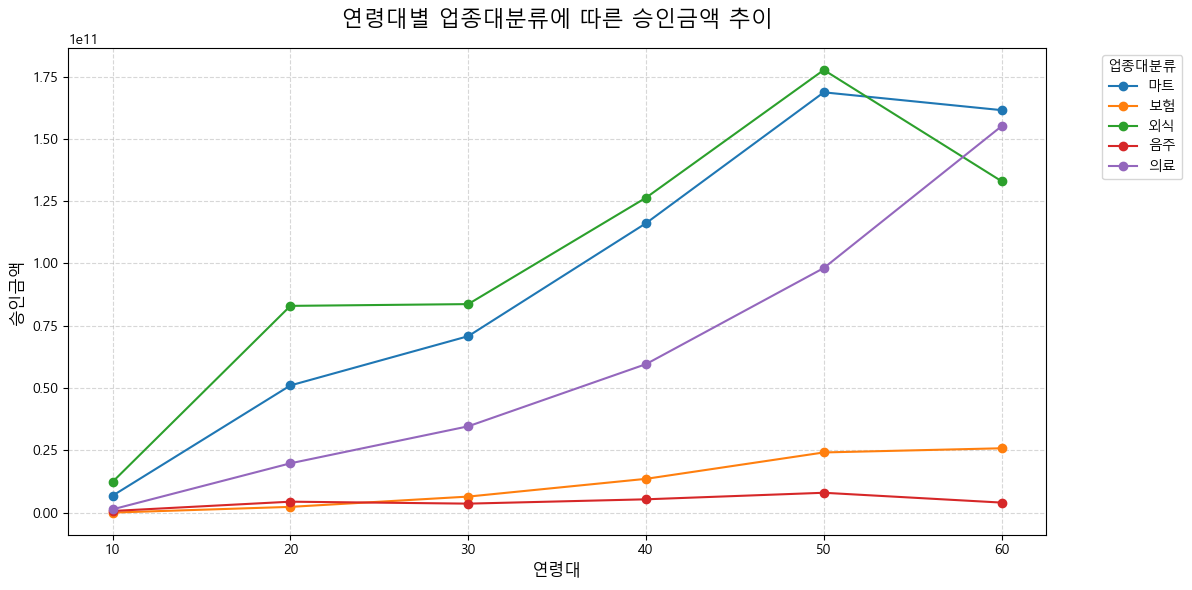

In [93]:
plt.figure(figsize=(12, 6))

for column in pivot_age.columns:
    if column in color_map:
        plt.plot(
            pivot_age.index,
            pivot_age[column],
            label=column,
            marker='o',
            color=color_map[column]
        )

plt.title('연령대별 업종대분류에 따른 승인금액 추이', fontsize=16, pad=15)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('승인금액', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='업종대분류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [95]:
# 월-연령대 기준으로 승인금액 합계 구하기
pivot_month_age = df.pivot_table(index='월', columns='연령대', values='승인금액', aggfunc='sum', fill_value=0)

# 월 정렬 (1~12월)
pivot_month_age = pivot_month_age.sort_index()

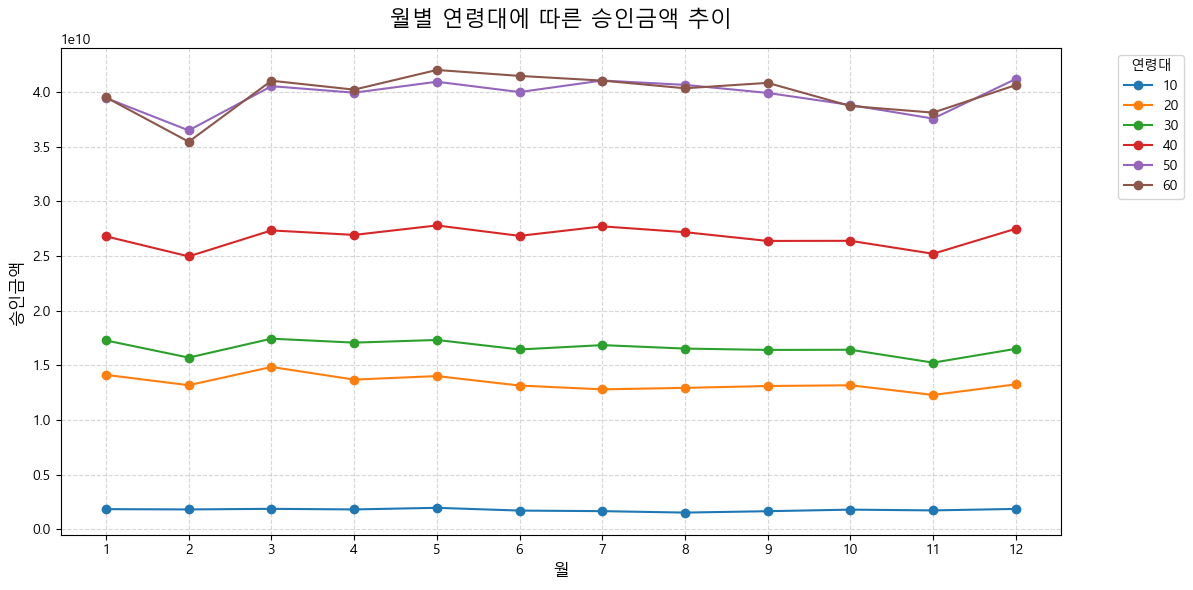

In [97]:
plt.figure(figsize=(12, 6))

for column in pivot_month_age.columns:
    plt.plot(pivot_month_age.index, pivot_month_age[column], label=column, marker='o')

plt.title('월별 연령대에 따른 승인금액 추이', fontsize=16, pad=15)
plt.xlabel('월', fontsize=12)
plt.ylabel('승인금액', fontsize=12)
plt.xticks(pivot_month_age.index)  # 월 1~12 그대로
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='연령대', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()